<a href="https://colab.research.google.com/github/allenhutfc/machineLearning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

準備資料多寡 ＝ 問題難易度(欄位多寡)

1. 機器學習： k-w
2. 深度學習： w-10w

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False) #過濾負的年齡

# DataFrame(2D) , Series(1D)
data = pd.DataFrame(diabetes["data"] , columns=diabetes["feature_names"])
data["ans"] = diabetes["target"]  #資料分成2份,一個訓練一個驗證
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,ans
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [2]:
from sklearn.model_selection import train_test_split
x = data.drop("ans",axis=1) # 把ans移除 , axis:0 橫的 , axis:1 直的
y = data["ans"]
# [90% x, 10% x , 90% y , 10% y]
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.1)
x_train , x_test

(      age  sex   bmi      bp     s1     s2    s3   s4      s5     s6
 115  40.0  2.0  26.5   93.00  236.0  147.0  37.0  7.0  5.5607   92.0
 227  67.0  2.0  23.6  111.33  189.0  105.4  70.0  2.7  4.2195   93.0
 299  59.0  2.0  25.1   90.00  163.0  101.4  46.0  4.0  4.3567   91.0
 307  67.0  2.0  23.5   96.00  207.0  138.2  42.0  5.0  4.8978  111.0
 350  41.0  2.0  32.0  126.00  198.0  104.2  49.0  4.0  5.4116  124.0
 ..    ...  ...   ...     ...    ...    ...   ...  ...     ...    ...
 55   37.0  1.0  21.8   84.00  184.0  101.0  73.0  3.0  3.9120   93.0
 377  54.0  2.0  27.3  100.00  200.0  144.0  33.0  6.0  4.7449   76.0
 171  43.0  1.0  22.1   66.00  134.0   77.2  45.0  3.0  4.0775   80.0
 314  42.0  1.0  30.1   91.00  182.0  114.8  49.0  4.0  4.5109   82.0
 306  51.0  2.0  26.2  101.00  161.0   99.6  48.0  3.0  4.2047   88.0
 
 [397 rows x 10 columns],
       age  sex   bmi      bp     s1     s2    s3    s4      s5     s6
 16   47.0  1.0  30.3  109.00  207.0  100.2  70.0  3.00  5.21

In [3]:
from sklearn.tree import DecisionTreeRegressor
# clf = DecisionTreeRegressor()  # 沒加參數
reg = DecisionTreeRegressor(max_depth=2) # 決策樹 最大到幾層
reg.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= 4.64\nsquared_error = 5733.472\nsamples = 397\nvalue = 151.239'),
 Text(0.25, 0.5, 'bmi <= 26.95\nsquared_error = 3326.091\nsamples = 208\nvalue = 112.986'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2113.598\nsamples = 160\nvalue = 97.856'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4061.451\nsamples = 48\nvalue = 163.417'),
 Text(0.75, 0.5, 'bmi <= 28.05\nsquared_error = 5000.055\nsamples = 189\nvalue = 193.339'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4018.053\nsamples = 102\nvalue = 165.078'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4117.261\nsamples = 87\nvalue = 226.471')]

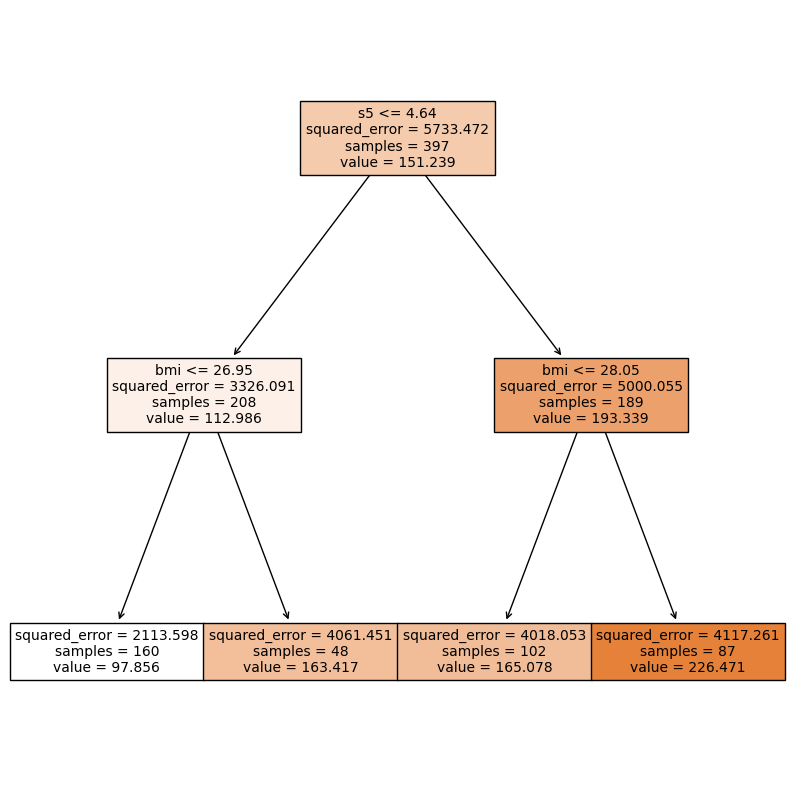

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#plot_tree( clf ,feature_names=x.columns) #原始版
plt.figure(figsize=[10,10]) #畫得比較漂亮
plot_tree(reg ,
          feature_names=x.columns,
          filled=True,
          max_depth=2)



In [17]:
pre = reg.predict(x_test)
pre


array([226.47126437,  97.85625   , 165.07843137, 163.41666667,
       163.41666667, 165.07843137, 226.47126437, 226.47126437,
       165.07843137,  97.85625   , 165.07843137, 165.07843137,
        97.85625   , 165.07843137, 163.41666667, 163.41666667,
       165.07843137, 226.47126437,  97.85625   ,  97.85625   ,
        97.85625   ,  97.85625   ,  97.85625   , 165.07843137,
       226.47126437,  97.85625   ,  97.85625   ,  97.85625   ,
       165.07843137, 226.47126437, 165.07843137,  97.85625   ,
       165.07843137,  97.85625   ,  97.85625   , 165.07843137,
       165.07843137,  97.85625   ,  97.85625   , 226.47126437,
        97.85625   , 226.47126437,  97.85625   , 226.47126437,
       226.47126437])

In [18]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test,pre)


0.466279556458129

In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores=cross_val_score(reg, x,  y,  scoring="r2", cv=10, n_jobs =-1)
print(scores)
print(np.average(scores))

[0.28897364 0.16168834 0.30122639 0.48723453 0.30735793 0.5135879
 0.29810844 0.01757394 0.15153891 0.55875239]
0.30860424184842017
